In [340]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Original Data Source : https://data.usaid.gov/HIV-AIDS/Supply-Chain-Shipment-Pricing-Data/a3rc-nmf6

#### This data set provides supply chain health commodity shipment and pricing data. Specifically, the data set identifies Antiretroviral (ARV) and HIV lab shipments to supported countries. In addition, the data set provides the commodity pricing and associated supply chain expenses necessary to move the commodities to countries for use. The dataset has similar fields to the Global Fund's Price, Quality and Reporting (PQR) data. PEPFAR and the Global Fund represent the two largest procurers of HIV health commodities. This dataset, when analyzed in conjunction with the PQR data, provides a more complete picture of global spending on specific health commodities. The data are particularly valuable for understanding ranges and trends in pricing as well as volumes delivered by country. The US Government believes this data will help stakeholders make better, data-driven decisions. Care should be taken to consider contextual factors when using the database. Conclusions related to costs associated with moving specific line items or products to specific countries and lead times by product/country will not be accurate.

In [377]:
pd.set_option('display.max_columns', 40)
data=pd.read_csv(r"C:\Users\Shashank Sundi\Desktop\I neuron\assignments\SCM SHIPMENT PRICING\SCMS_Delivery_History_Dataset.csv")
data.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


#### Data Description

##### 1. ID - identity number
##### 2. Project Code - Project code for the shipment 
##### 3. PQ # - Price quote (PQ) number
##### 4. PO / SO # - Price Order / Sales Order --- PO is a buyer's request to a seller (supplier) to order the goods/services
##### 5. ASN/DN # - Shipment number: Advanced Shipment Note (ASN) for Direct Drop deliveries, or Delivery Note (DN) for from RDC deliveries
##### 6. Country - Destination country , where shipment is to be delivered
##### 7. Managed By - SCMS managing office: either the Program Management Office (PMO) in the U.S. or the relevant SCMS field office
##### 8. Fulfill Via - Method through which the shipment was fulfilled: via Direct Drop from vendor or from stock available in the RDCs( retail distribution centers )
##### 9. Vendor INCO Term - The vendor INCO term (also known as International Commercial Terms) for Direct Drop deliveries---a set of 11 internationally recognized rules which define the responsibilities of sellers and buyers. Incoterms specifies who is responsible for paying for and managing the shipment, insurance, documentation, customs clearance, and other logistical activities.
##### 10. Shipment Mode - Method by which commodities are shipped
##### 11. PQ First Sent to Client Date - Date the PQ is first sent to the client
##### 12. PO Sent to Vendor Date - Date the PO is first sent to the vendor
##### 13. Scheduled Delivery Date - Date on which delivery to client was recorded in SCMS information systems
##### 14. Product Group - Product group for item, i.e. ARV, HRDT
##### 15. Sub Classification - Identifies relevant product sub classifications, such as whether ARVs are pediatric or adult, whether a malaria product is an artemisinin-based combination therapy (ACT), etc.
##### 16. Vendor - Vendor name
##### 17. Item Description - Product name and formulation from Partnership for Supply Chain Management (PFSCM) Item Master
##### 18. Molecule/Test Type - Active drug(s) or test kit type
##### 19. Brand - Generic or branded name for the item
##### 20. Dosage - Item dosage and unit
##### 21. Dosage Form - Dosage form for the item (tablet, oral solution, injection, etc.).
##### 22. Unit of Measure (Per Pack) - Pack quantity (pills or test kits) used to compute unit price
##### 23. Line Item Quantity - Total quantity (packs) of commodity per line item
##### 24. Line Item Value - Total value of commodity per line item
##### 25. Pack Price - Cost per pack (i.e. month s supply of ARVs, pack of 60 test kits)
##### 26. Unit Price - Cost per pill (for drugs) or per test (for test kits)
##### 27. Manufacturing Site - Identifies manufacturing site for the line item for direct drop and from RDC deliveries
##### 28. First Line Designation - Designates if the line in question shows the aggregated freight costs and weight associated with all items on the ASN DN
##### 29. Weight (Kilograms) - Weight for all lines on an ASN DN
##### 30. Freight Cost (USD) - Freight charges associated with all lines on the respective ASN DN
##### 31. Line Item Insurance (USD) - Line item cost of insurance, created by applying an annual flat rate ( ) to commodity cost

In [378]:
# pack price = unit measure per pack * unit price
# Line item value =  no. of items in line * price of a pack

# Target column -----> Shipment Price( total value of transporting the shipment to destination)=freight cost + line item value + Line item insurance
# So we'll create a new feature for that later on 

In [379]:
# Checking and Validating Data Types

pd.DataFrame(data=data.dtypes.values,index=data.dtypes.index).T

# we can see that columns - Scheduled Delivery Date , 	Delivered to Client Date,	Delivery Recorded Date ,PQ First Sent to Client Date,PO Sent to Vendor Date are dates , but are identified as 'object' type
# We can also see that columns - Weight (Kilograms)	, Freight Cost (USD) are actually numeric values , but are classified as 'object' type
# We need to change the data types of above identified columns

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,float64,float64,float64,object,object,object,object,float64


In [380]:
for i in ['Weight (Kilograms)', 'Freight Cost (USD)','PQ First Sent to Client Date','PO Sent to Vendor Date']:
    print(data[i].value_counts().head(),"\n\n")

Weight Captured Separately    1507
2                               29
6                               26
1                               23
5                               20
Name: Weight (Kilograms), dtype: int64 


Freight Included in Commodity Cost    1442
Invoiced Separately                    239
9736.1                                  36
6147.18                                 27
See DN-304 (ID#:10589)                  16
Name: Freight Cost (USD), dtype: int64 


Pre-PQ Process       2476
Date Not Captured     205
9/11/14               205
7/11/13               173
4/30/14               123
Name: PQ First Sent to Client Date, dtype: int64 


N/A - From RDC       5404
Date Not Captured     328
8/27/14                80
3/19/10                78
8/29/14                76
Name: PO Sent to Vendor Date, dtype: int64 




In [381]:
# in above cell we observe that some of the weights were weighed separately and hence we don't have info about those weights , so we replace them with nan
# moreover , in freight cost column , the cost was either not read from the ASN/DN , or Invoiced Separately etc.  ; hence it says to read from the tag itself manually ,
#  which is not feasible for every product , so we replace it with nan

# To capture the importance of the fact that it was measured separately ,Weight Captured Separately , freight included in commo..etc. , we'll create a new feature , else we might lose 
# some important info

# Creating new feature features to capture importance of special cases where measurements could either not be read , or were recorded separately

# For Freight Cost
data['Freight_cost_special']=0
for i in range(data.shape[0]):

    if data['Freight Cost (USD)'].loc[i]  in ["Freight Included in Commodity Cost",'Invoiced Separately']:
        data['Freight_cost_special'].loc[i]=data['Freight Cost (USD)'].loc[i]

    elif str(data['Freight Cost (USD)'].loc[i]).split(" ")[0]=="See":
        data['Freight_cost_special'].loc[i]="See ASN/DN Tag"

    else :
        data['Freight_cost_special'].loc[i]="Normal Measurement"


# For Shipment weight
data['Weight_special']=0
for i in range(data.shape[0]):

    if data['Weight (Kilograms)'].loc[i]  in ["Weight Captured Separately"]:
        data['Weight_special'].loc[i]=data['Weight (Kilograms)'].loc[i]

    elif str(data['Freight Cost (USD)'].loc[i]).split(" ")[0]=="See":
        data['Weight_special'].loc[i]="See ASN/DN Tag"

    else :
        data['Weight_special'].loc[i]="Normal Measurement"

# For PQ First Sent to Client Date	

data['PQ_date_sent']=0
for i in range(data.shape[0]):

    if data['PQ First Sent to Client Date'].loc[i]  in ['Pre-PQ Process','Date Not Captured']:
        data['PQ_date_sent'].loc[i]=data['PQ First Sent to Client Date'].loc[i]
    else :
        data['Weight_special'].loc[i]="Date Captured"

# For PO Sent to Vendor Date

data['PO_date_sent']=0
for i in range(data.shape[0]):

    if data['PO Sent to Vendor Date'].loc[i]  in ['N/A - From RDC' ,'Date Not Captured']:
        data['PO_date_sent'].loc[i]=data['PO Sent to Vendor Date'].loc[i]

    else :
        data['PO_date_sent'].loc[i]="Date Captured"

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [382]:
# Converting data types to Datetime

# For PQ First Sent to Client Date	& For PO Sent to Vendor Date --- approximately 30-50% data is missing and the dates are not sequential , so we can't 
# impute it in any way . So , after we have captured the importance of missing dates in previous cell . We will drop the two columns----if we had the all dates , then we could have found another feature

for i in ['Scheduled Delivery Date', 'Delivered to Client Date','Delivery Recorded Date']:
    data[i]=pd.to_datetime(data[i], infer_datetime_format=True)

# Converting data types to Numeric

for i in ['Weight (Kilograms)', 'Freight Cost (USD)']:
    data[i]=pd.to_numeric(data[i],errors='coerce')

In [383]:
# Rearranging data
# and excluding the columns - 'ID', 'Project Code' ,'PQ' , 'PO/SO' , 'ASD/DN' , 'PQ First Sent to Client Date', 'For PO Sent to Vendor Date'

data=data[['Country','Vendor','Manufacturing Site', 'Brand', 'Item Description','Product Group', 'Sub Classification',
       'Molecule/Test Type','Dosage Form','Dosage','Managed By', 'Vendor INCO Term','Fulfill Via', 'Shipment Mode',
       'Scheduled Delivery Date', 'Delivered to Client Date','Delivery Recorded Date',  'Unit of Measure (Per Pack)',
        'Line Item Quantity','Line Item Value', 'Pack Price', 'Unit Price','First Line Designation', 'Weight (Kilograms)',
        'Weight_special', 'Freight Cost (USD)', 'Freight_cost_special','Line Item Insurance (USD)']]
data.head()

,Country,Vendor,Manufacturing Site,Brand,Item Description,Product Group,Sub Classification,Molecule/Test Type,Dosage Form,Dosage,Managed By,Vendor INCO Term,Fulfill Via,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,Weight (Kilograms),Weight_special,Freight Cost (USD),Freight_cost_special,Line Item Insurance (USD)
0,Côte d'Ivoire,RANBAXY Fine Chemicals LTD.,Ranbaxy Fine Chemicals LTD,Reveal,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...",HRDT,HIV test,"HIV, Reveal G3 Rapid HIV-1 Antibody Test",Test kit,NaN,PMO - US,EXW,Direct Drop,Air,2006-06-02,2006-06-02,2006-06-02,30,19,551.0,29.00,0.97,Yes,13.0,Normal Measurement,780.34,Normal Measurement,NaN
1,Vietnam,Aurobindo Pharma Limited,"Aurobindo Unit III, India",Generic,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",ARV,Pediatric,Nevirapine,Oral suspension,10mg/ml,PMO - US,EXW,Direct Drop,Air,2006-11-14,2006-11-14,2006-11-14,240,1000,6200.0,6.20,0.03,Yes,358.0,Normal Measurement,4521.50,Normal Measurement,NaN
2,Côte d'Ivoire,Abbott GmbH & Co. KG,ABBVIE GmbH & Co.KG Wiesbaden,Determine,"HIV 1/2, Determine Complete HIV Kit, 100 Tests",HRDT,HIV test,"HIV 1/2, Determine Complete HIV Kit",Test kit,NaN,PMO - US,FCA,Direct Drop,Air,2006-08-27,2006-08-27,2006-08-27,100,500,40000.0,80.00,0.80,Yes,171.0,Normal Measurement,1653.78,Normal Measurement,NaN
3,Vietnam,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Ranbaxy, Paonta Shahib, India",Generic,"Lamivudine 150mg, tablets, 60 Tabs",ARV,Adult,Lamivudine,Tablet,150mg,PMO - US,EXW,Direct Drop,Air,2006-09-01,2006-09-01,2006-09-01,60,31920,127360.8,3.99,0.07,Yes,1855.0,Normal Measurement,16007.06,Normal Measurement,NaN
4,Vietnam,Aurobindo Pharma Limited,"Aurobindo Unit III, India",Generic,"Stavudine 30mg, capsules, 60 Caps",ARV,Adult,Stavudine,Capsule,30mg,PMO - US,EXW,Direct Drop,Air,2006-08-11,2006-08-11,2006-08-11,60,38000,121600.0,3.20,0.05,Yes,7590.0,Normal Measurement,45450.08,Normal Measurement,NaN


In [384]:
# Now , all dtypes are correct
pd.DataFrame(data=data.dtypes.values,index=data.dtypes.index).T

,Country,Vendor,Manufacturing Site,Brand,Item Description,Product Group,Sub Classification,Molecule/Test Type,Dosage Form,Dosage,Managed By,Vendor INCO Term,Fulfill Via,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,Weight (Kilograms),Weight_special,Freight Cost (USD),Freight_cost_special,Line Item Insurance (USD)
0,object,object,object,object,object,object,object,object,object,object,object,object,object,object,datetime64[ns],datetime64[ns],datetime64[ns],int64,int64,float64,float64,float64,object,float64,object,float64,object,float64


In [385]:
# getting index of object type column names
categ_index=data.dtypes[data.dtypes=='object'].index

# getting index of numeric type columns
floats=data.dtypes[data.dtypes=='float64'].index
ints=data.dtypes[data.dtypes=='int64'].index

num_index=floats.append(ints)

# getting index of datetime columns
date_index=data.dtypes[data.dtypes=='datetime64[ns]'].index


In [386]:
# Statistical properties of numerical columns

data[num_index].describe()

,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Unit of Measure (Per Pack),Line Item Quantity
count,1.032400e+04,10324.000000,10324.000000,6372.000000,6198.000000,10037.000000,10324.000000,10324.000000
mean,1.576506e+05,21.910241,0.611701,3424.441306,11103.234819,240.117626,77.990895,18332.534870
std,3.452921e+05,45.609223,3.275808,13526.968270,15813.026692,500.190568,76.579764,40035.302961
min,0.000000e+00,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,1.000000
25%,4.314593e+03,4.120000,0.080000,206.750000,2131.120000,6.510000,30.000000,408.000000
50%,3.047147e+04,9.300000,0.160000,1047.000000,5869.655000,47.040000,60.000000,3000.000000
75%,1.664471e+05,23.592500,0.470000,3334.000000,14406.570000,252.400000,90.000000,17039.750000
max,5.951990e+06,1345.640000,238.650000,857354.000000,289653.200000,7708.440000,1000.000000,619999.000000


In [387]:
# Statistical properties of categorical columns

data[categ_index].describe()

,Country,Vendor,Manufacturing Site,Brand,Item Description,Product Group,Sub Classification,Molecule/Test Type,Dosage Form,Dosage,Managed By,Vendor INCO Term,Fulfill Via,Shipment Mode,First Line Designation,Weight_special,Freight_cost_special
count,10324,10324,10324,10324,10324,10324,10324,10324,10324,8588,10324,10324,10324,9964,10324,10324,10324
unique,43,73,88,48,184,5,6,86,17,54,4,8,2,4,2,4,4
top,South Africa,SCMS from RDC,"Aurobindo Unit III, India",Generic,"Efavirenz 600mg, tablets, 30 Tabs",ARV,Adult,Efavirenz,Tablet,300mg,PMO - US,N/A - From RDC,From RDC,Air,Yes,Date Captured,Normal Measurement
freq,1406,5404,3172,7285,755,8550,6595,1125,3532,990,10265,5404,5404,6113,7030,7643,6198


In [389]:
# Feature Engineering ( New Features are important KPI's in logistics )

data['Delivered to Client Date']-data['Scheduled Delivery Date'] # --------- Delay in Delivery
# +ve days denotes Late delivery

data['Delivery Recorded Date']-data['Delivered to Client Date']  # --------- Delay in Delivery_verification_time

# time taken to place order , after Price Quote ws received by Client
#data['PQ First Sent to Client Date']-data['PO Sent to Vendor Date']

# value of shipment = (freight price + Line Item Value + Line Item insurance )/Line Item Quantity    -------- assigns higher value to sales driving shipments,rather than volume driving shipments

0       0 days
1       0 days
2       0 days
3       0 days
4       0 days
         ...  
10319   5 days
10320   1 days
10321   9 days
10322   7 days
10323   7 days
Length: 10324, dtype: timedelta64[ns]

## EDA 

In [391]:
len(num_index)

8

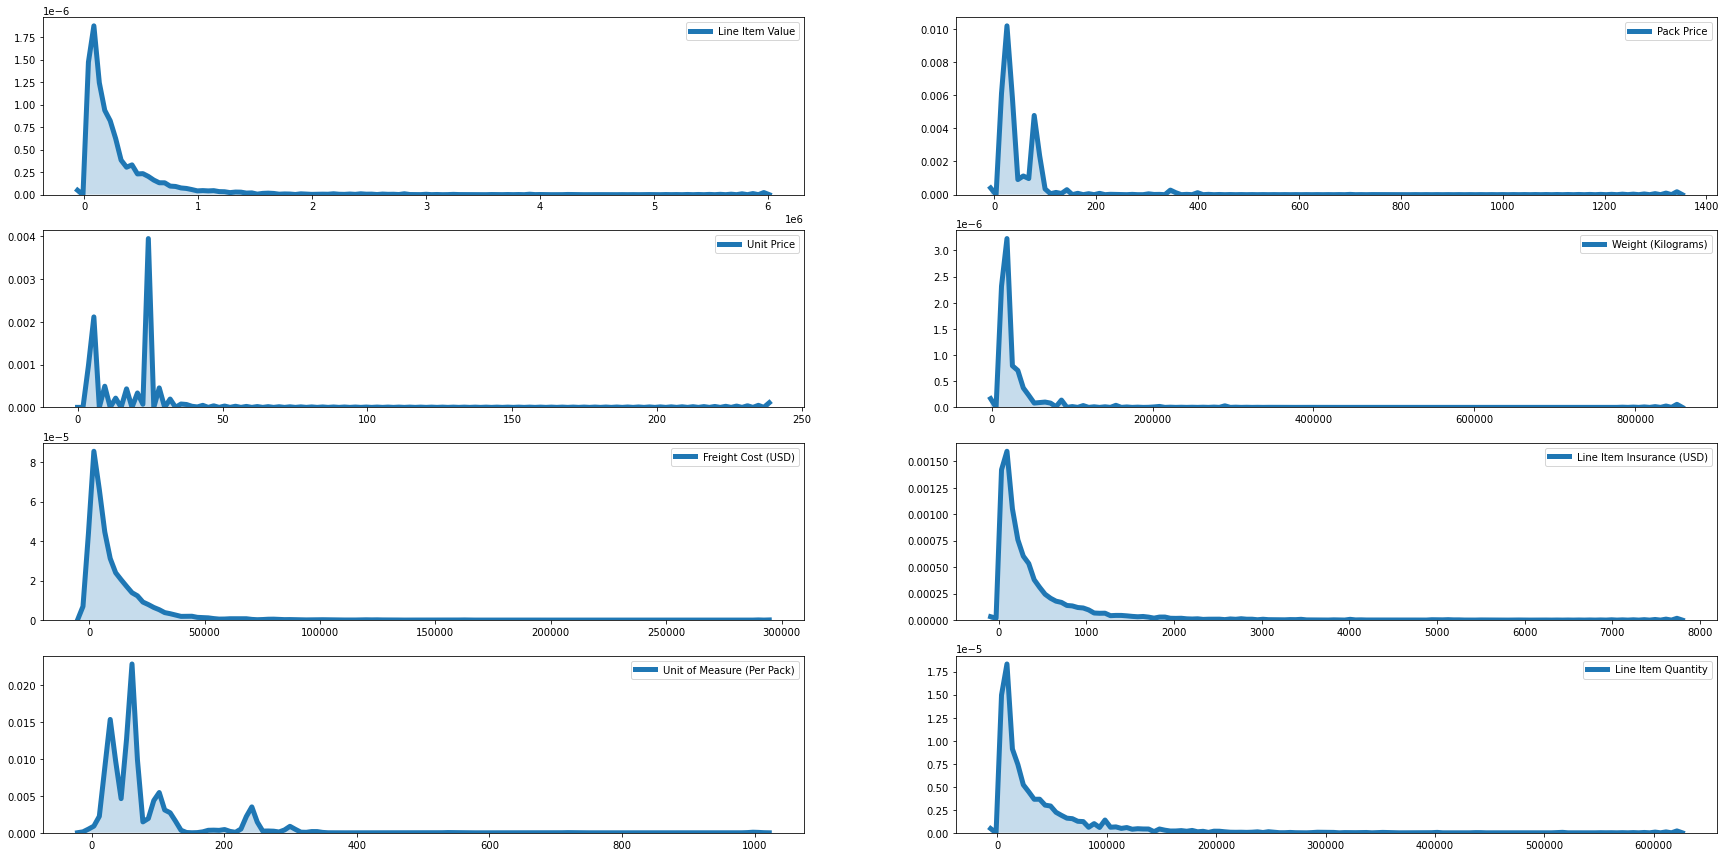

In [395]:
# Checking Distribution of data in columns

fig,ax=plt.subplots(4,2,figsize=(30,15))

i,j=0,0
for col in num_index:
    sns.kdeplot(data[col],ax=ax[i,j],shade=True,linewidth=5,)
    j+=1
    if j==2:
        j=0
        i+=1
    

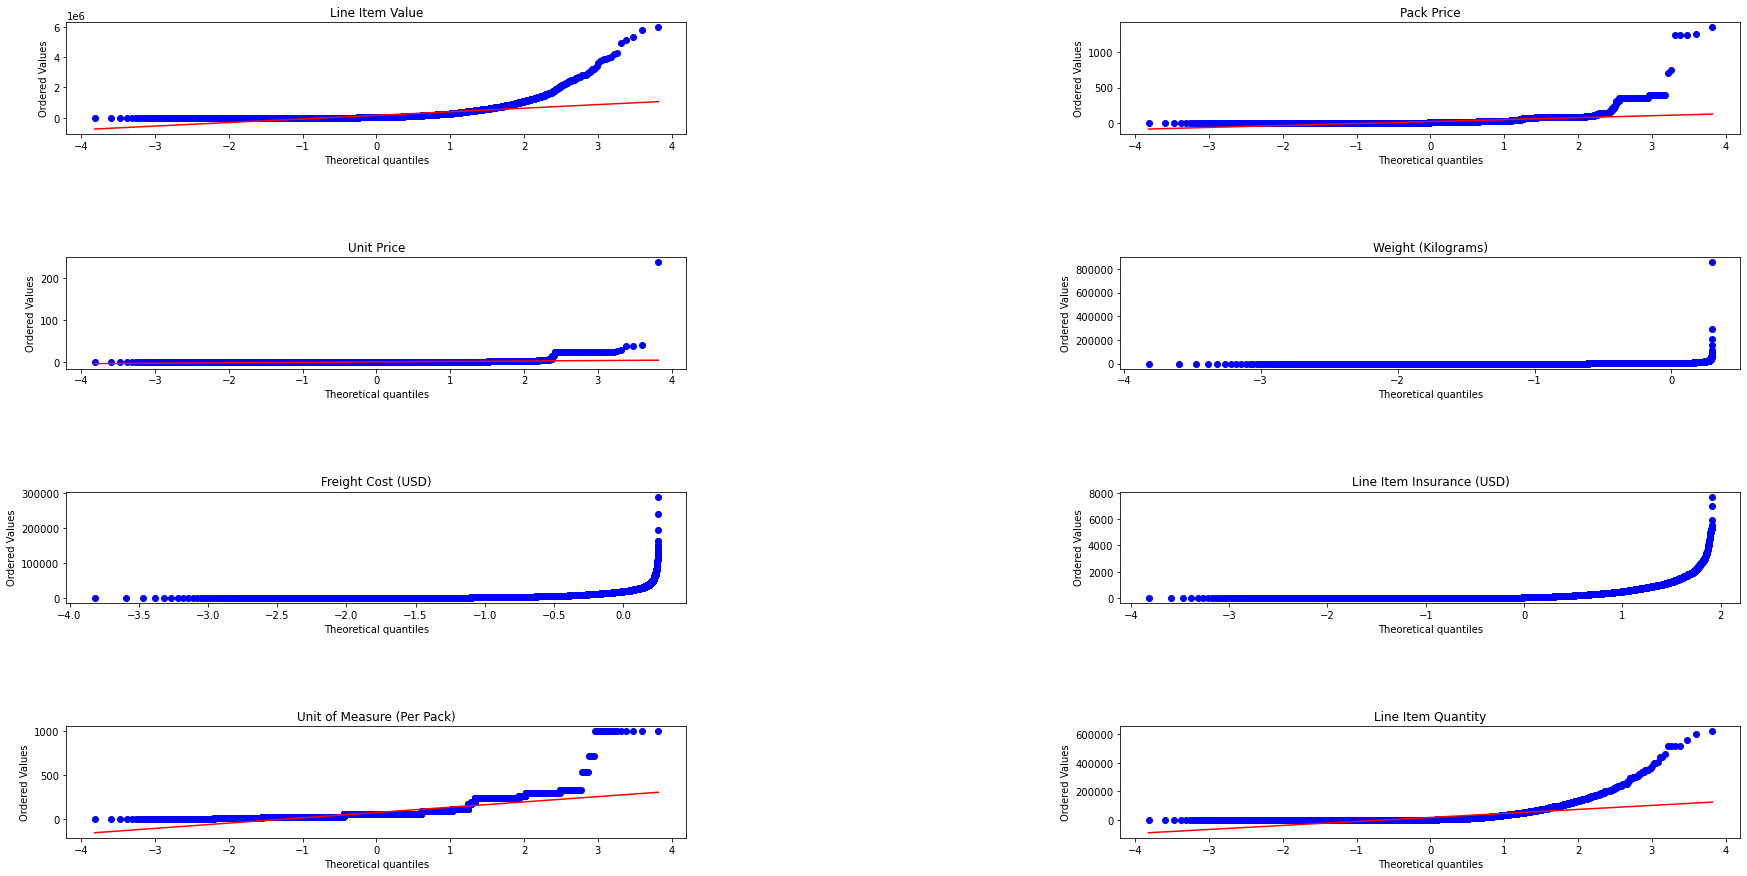

In [397]:
# Checking Normality of distribution using Normal Probability Plot

from scipy import stats

fig,ax=plt.subplots(4,2,figsize=(30,15))
plt.subplots_adjust( 
                    wspace=0.7, 
                    hspace=1.1)

a,b=0,0
for col in num_index:
    stats.probplot(data[col],plot=ax[a,b])
    ax[a,b].set_title(col)
    b+=1
    if b==2:
        b=0
        a+=1

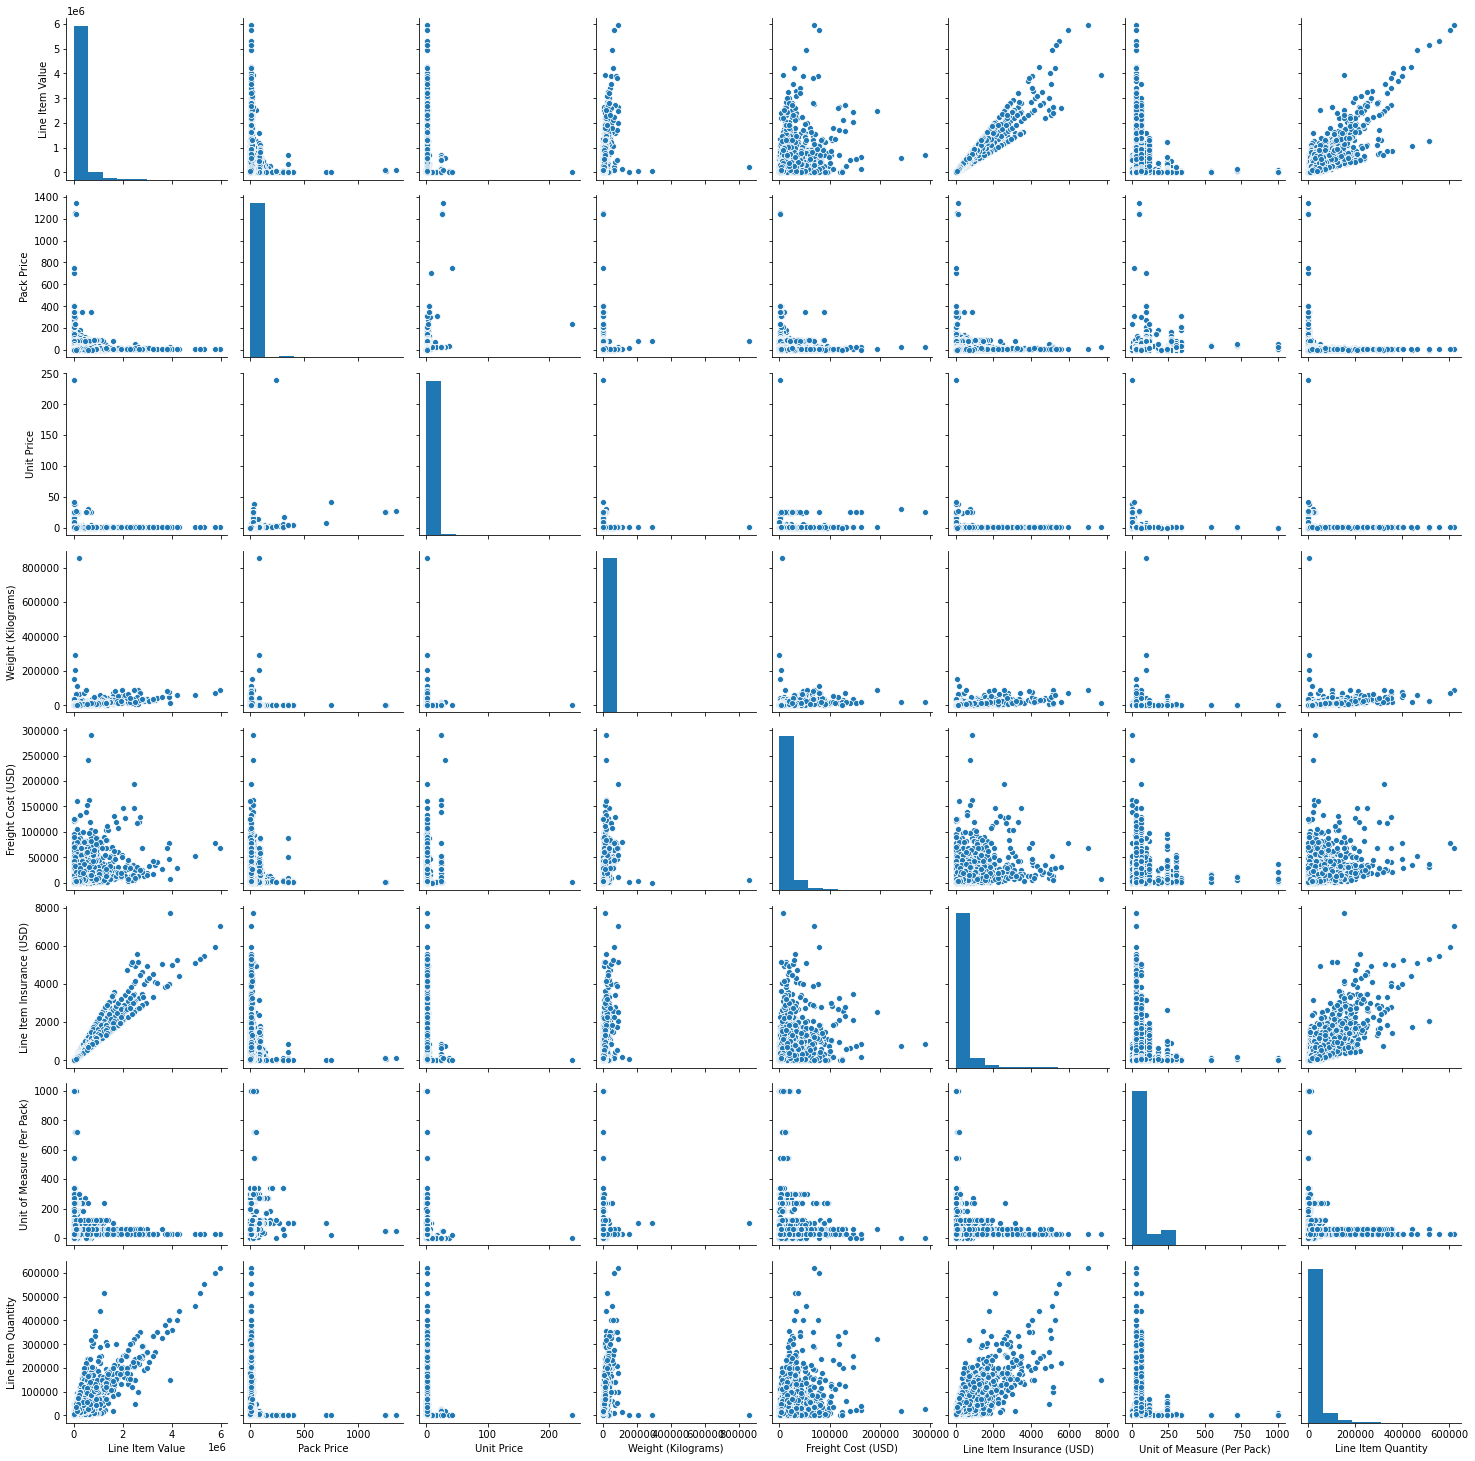

In [398]:
# Visualizing Correlation b/w features ,using Scatter Plots

sns.pairplot(data[num_index])

Text(0, 0.5, 'Shipment Value')

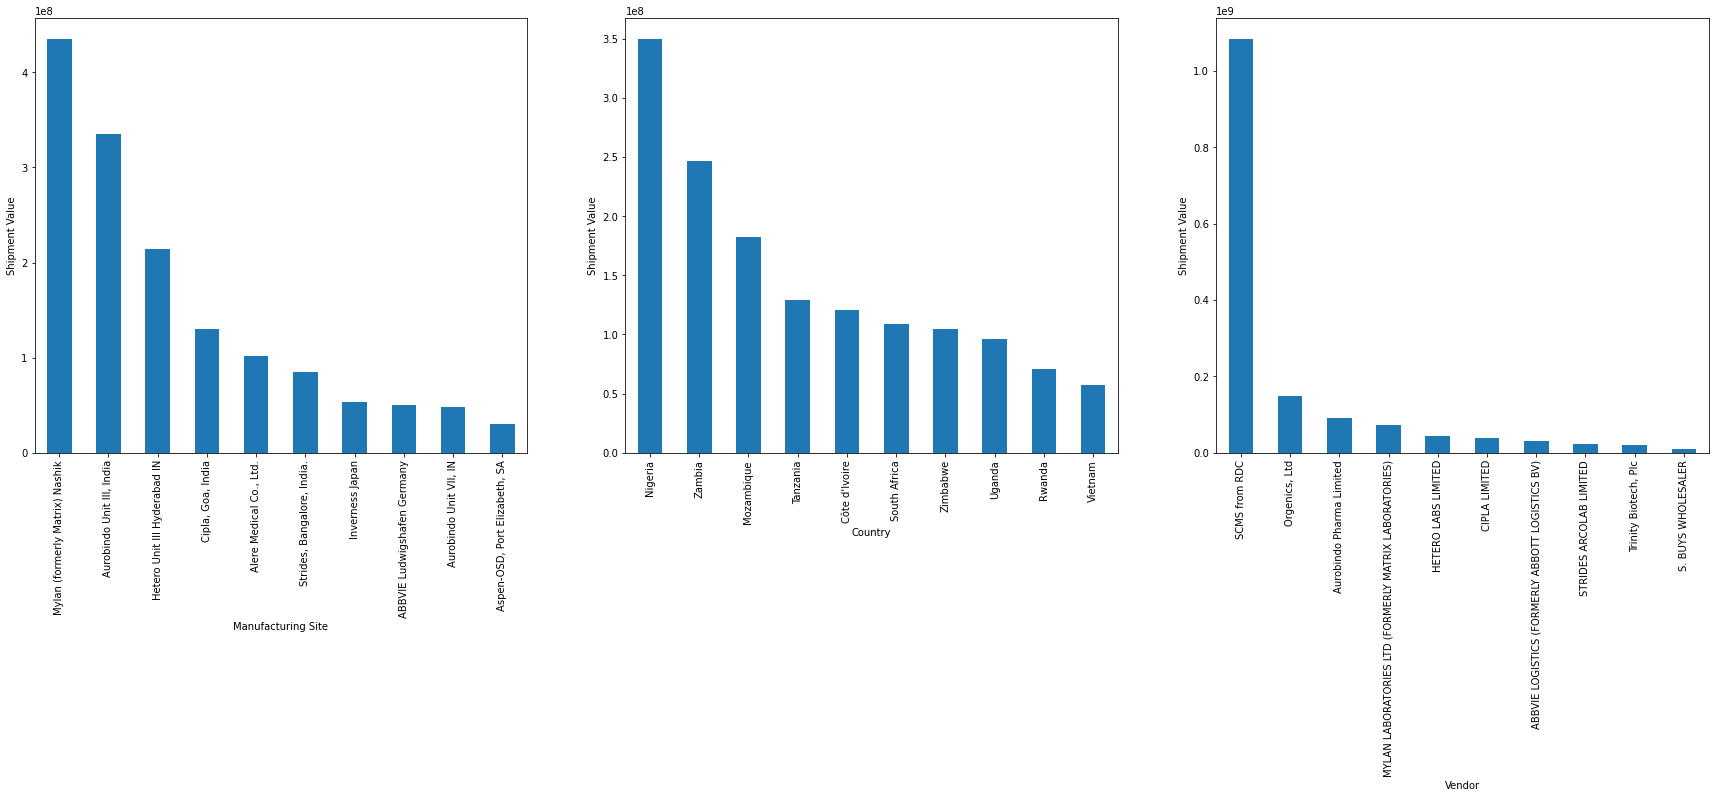

In [399]:
fig,ax=plt.subplots(1,3,figsize=(30,8))

# Top 10 Manufacturing sites by Total Price/Value of Packs produced 
data.groupby(['Manufacturing Site'])['Line Item Value'].sum().nlargest(10).plot(kind='bar',ax=ax[0])
ax[0].set_ylabel('Shipment Value')

# Top 10 Countries by Total Price/Value of Packs produced 
data.groupby(['Country'])['Line Item Value'].sum().nlargest(10).plot(kind='bar',ax=ax[1])
ax[1].set_ylabel('Shipment Value')

# Top 10 Vendors sites by Total Price/Value of Packs produced 
data.groupby(['Vendor'])['Line Item Value'].sum().nlargest(10).plot(kind='bar',ax=ax[2])
ax[2].set_ylabel('Shipment Value')

Text(0, 0.5, 'Shipment Value')

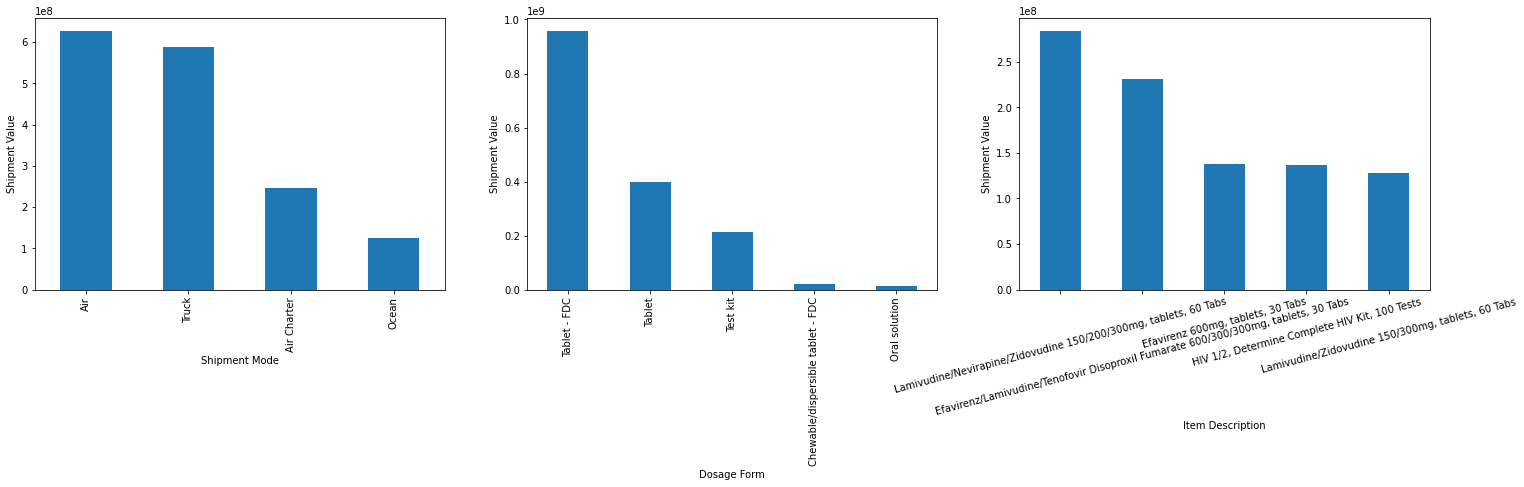

In [402]:
fig,ax=plt.subplots(1,3,figsize=(25,5))
data.groupby(['Shipment Mode'])['Line Item Value'].sum().nlargest(5).plot(kind='bar',ax=ax[0])
ax[0].set_ylabel('Shipment Value')
data.groupby(['Dosage Form'])['Line Item Value'].sum().nlargest(5).plot(kind='bar',ax=ax[1])
ax[1].set_ylabel('Shipment Value')
data.groupby(['Item Description'])['Line Item Value'].sum().nlargest(5).plot(kind='bar',ax=ax[2])
plt.xticks(rotation=15)
ax[2].set_ylabel('Shipment Value')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

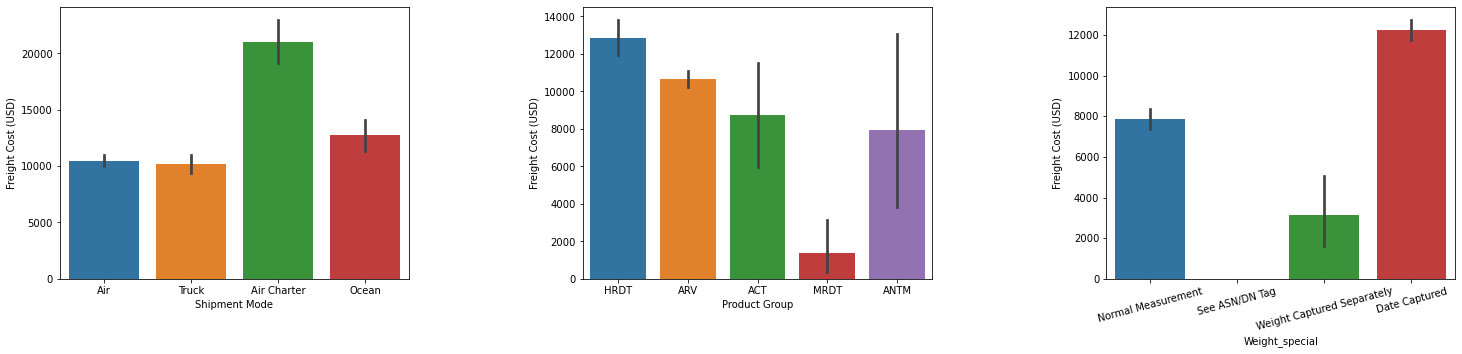

In [403]:
fig,ax=plt.subplots(1,3,figsize=(25,5))
plt.subplots_adjust( wspace=0.5)

sns.barplot('Shipment Mode','Freight Cost (USD)',data=data,ax=ax[0])
sns.barplot('Product Group','Freight Cost (USD)',data=data,ax=ax[1])
sns.barplot('Weight_special','Freight Cost (USD)',data=data,ax=ax[2])
plt.xticks(rotation=15)


In [404]:
# Checking for Null values
pd.DataFrame(data=data.isnull().sum().values,index=data.isnull().sum().index).T

,Country,Vendor,Manufacturing Site,Brand,Item Description,Product Group,Sub Classification,Molecule/Test Type,Dosage Form,Dosage,Managed By,Vendor INCO Term,Fulfill Via,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,Weight (Kilograms),Weight_special,Freight Cost (USD),Freight_cost_special,Line Item Insurance (USD)
0,0,0,0,0,0,0,0,0,0,1736,0,0,0,360,0,0,0,0,0,0,0,0,0,3952,0,4126,0,287


In [405]:
# Getting Columns with null values

null_val_cols=(data.isnull().sum()[data.isnull().sum()>0]).index
null_val_cols

Index(['Dosage', 'Shipment Mode', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [407]:
# Random Sample Imputation for Categorical Columns

for col in ['Dosage', 'Shipment Mode']:
    rand_samples=data[col].dropna().sample(data[col].isnull().sum())
    rand_samples.index=data[data[col].isnull()].index
    data.loc[data[col].isnull(),col]=rand_samples

# KNN Imputation for numerical columns

from sklearn.impute import KNNImputer

for col in ['Weight (Kilograms)', 'Freight Cost (USD)','Line Item Insurance (USD)'] :
        imputer=KNNImputer(n_neighbors=10)
        data[col]=imputer.fit_transform(data[[col]])

In [409]:
pd.DataFrame(data=data.isnull().sum().values,index=data.isnull().sum().index).T

,Country,Vendor,Manufacturing Site,Brand,Item Description,Product Group,Sub Classification,Molecule/Test Type,Dosage Form,Dosage,Managed By,Vendor INCO Term,Fulfill Via,Shipment Mode,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,Weight (Kilograms),Weight_special,Freight Cost (USD),Freight_cost_special,Line Item Insurance (USD)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [361]:
categ_index

Index(['Project Code', 'Country', 'Vendor', 'Manufacturing Site', 'Brand',
       'Item Description', 'Product Group', 'Sub Classification',
       'Molecule/Test Type', 'Dosage Form', 'Dosage', 'PQ #', 'PO / SO #',
       'ASN/DN #', 'Managed By', 'Vendor INCO Term', 'Fulfill Via',
       'Shipment Mode', 'PQ First Sent to Client Date',
       'PO Sent to Vendor Date', 'First Line Designation', 'Weight_special',
       'Freight_cost_special'],
      dtype='object')

In [ ]:
# Encode

In [362]:
for cols in categ_index:
    print(f"\n {data[cols].value_counts()}")


 116-ZA-T30    768
104-CI-T30    729
151-NG-T30    628
114-UG-T30    596
108-VN-T30    522
             ... 
136-RW-T01      1
100-SL-T01      1
100-SN-T01      1
A01-SN-T50      1
900-GY-T30      1
Name: Project Code, Length: 142, dtype: int64

 South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Pakistan                15
Guatemala               15
Malawi                 